In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dfjugadores_euro24 = pd.read_csv('D:\Descargas\euro2024_players.csv')
dfjugadores_euro24.head(100)

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany
...,...,...,...,...,...,...,...,...,...,...
95,Xherdan Shaqiri,Attacking Midfield,32,Chicago Fire FC,169,left,122,31,2500000,Switzerland
96,Noah Okafor,Left Winger,24,AC Milan,185,right,21,2,20000000,Switzerland
97,Steven Zuber,Left Winger,32,AEK Athens,182,right,53,11,2000000,Switzerland
98,Dan Ndoye,Right Winger,23,Bologna FC 1909,184,right,10,0,14000000,Switzerland


In [2]:
    # Realiza la limpieza de datos del DataFrame.
    
    # Eliminar filas duplicadas
    dfjugadores_euro24.drop_duplicates(inplace=True)
    
    # Manejo de valores nulos
    dfjugadores_euro24.fillna(dfjugadores_euro24.mean(numeric_only=True), inplace=True)
    dfjugadores_euro24.fillna("", inplace=True)  # Para columnas no numéricas

In [3]:
    # Realiza un análisis descriptivo del DataFrame.
    print("Primeras 5 filas del DataFrame:")
    print(dfjugadores_euro24.head(5))

Primeras 5 filas del DataFrame:
                    Name     Position  Age                 Club  Height  \
0  Marc-André ter Stegen   Goalkeeper   32         FC Barcelona     187   
1           Manuel Neuer   Goalkeeper   38        Bayern Munich     193   
2         Oliver Baumann   Goalkeeper   34  TSG 1899 Hoffenheim     187   
3     Nico Schlotterbeck  Centre-Back   24    Borussia Dortmund     191   
4           Jonathan Tah  Centre-Back   28  Bayer 04 Leverkusen     195   

    Foot  Caps  Goals  MarketValue  Country  
0  right    40      0     28000000  Germany  
1  right   119      0      4000000  Germany  
2  right     0      0      3000000  Germany  
3   left    12      0     40000000  Germany  
4  right    25      0     30000000  Germany  


In [4]:
print("Descripción estadística del DataFrame:")
print(dfjugadores_euro24.describe())

Descripción estadística del DataFrame:
              Age      Height        Caps       Goals   MarketValue
count  623.000000  623.000000  623.000000  623.000000  6.230000e+02
mean    27.040128  184.181380   30.338684    4.152488  1.840903e+07
std      4.124275    6.569258   30.987902   10.086803  2.426195e+07
min     16.000000  167.000000    0.000000    0.000000  5.000000e+04
25%     24.000000  180.000000    7.000000    0.000000  2.900000e+06
50%     27.000000  185.000000   21.000000    1.000000  9.000000e+06
75%     30.000000  189.000000   42.000000    4.000000  2.500000e+07
max     41.000000  202.000000  206.000000  128.000000  1.800000e+08


In [5]:
print("Información del DataFrame:")
print(dfjugadores_euro24.info())

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         623 non-null    object
 1   Position     623 non-null    object
 2   Age          623 non-null    int64 
 3   Club         623 non-null    object
 4   Height       623 non-null    int64 
 5   Foot         623 non-null    object
 6   Caps         623 non-null    int64 
 7   Goals        623 non-null    int64 
 8   MarketValue  623 non-null    int64 
 9   Country      623 non-null    object
dtypes: int64(5), object(5)
memory usage: 53.5+ KB
None


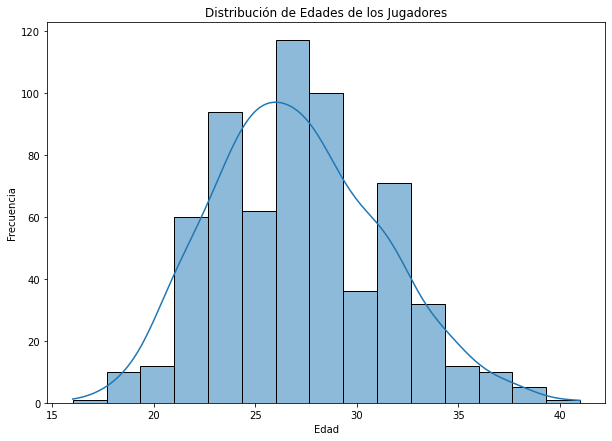

In [6]:
 # Histograma de las edades de los jugadores
plt.figure(figsize=(10, 7))
sns.histplot(dfjugadores_euro24['Age'], bins=15, kde=True)
plt.title('Distribución de Edades de los Jugadores')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

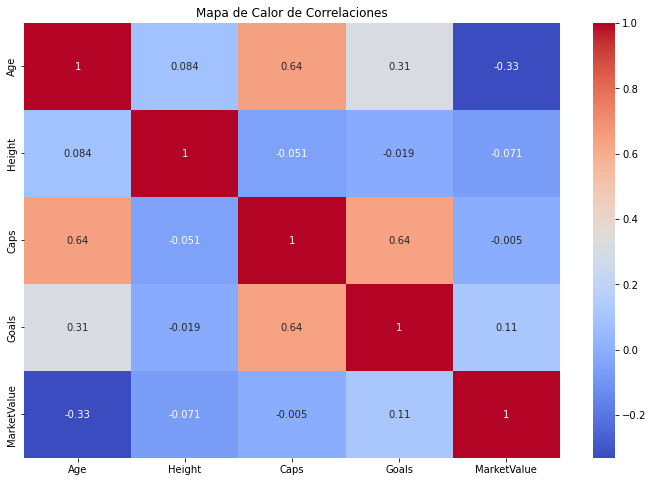

In [7]:
 # Mapa de calor de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(dfjugadores_euro24.corr(), annot=True, cmap="coolwarm")
plt.title("Mapa de Calor de Correlaciones")
plt.show()

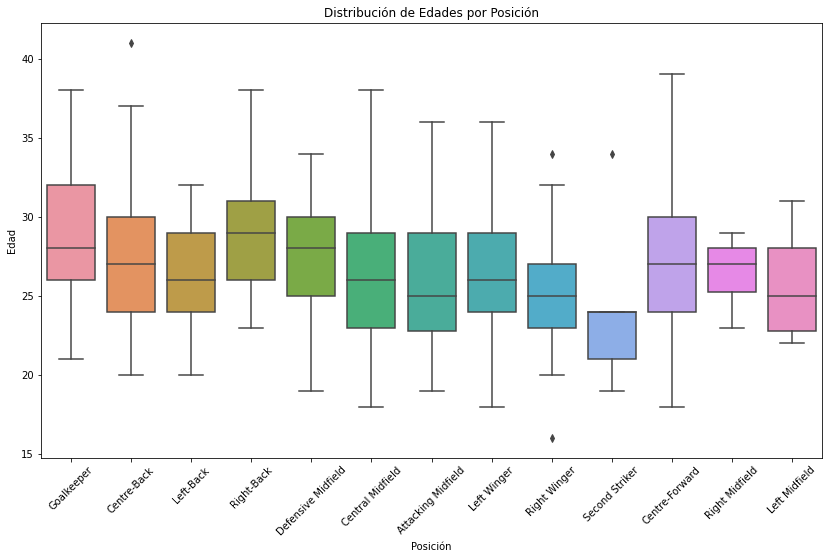

In [8]:
 # Boxplot de edades por posición
plt.figure(figsize=(14, 8))
sns.boxplot(x='Position', y='Age', data= dfjugadores_euro24)
plt.title('Distribución de Edades por Posición')
plt.xlabel('Posición')
plt.ylabel('Edad')
plt.xticks(rotation=45)
plt.show()

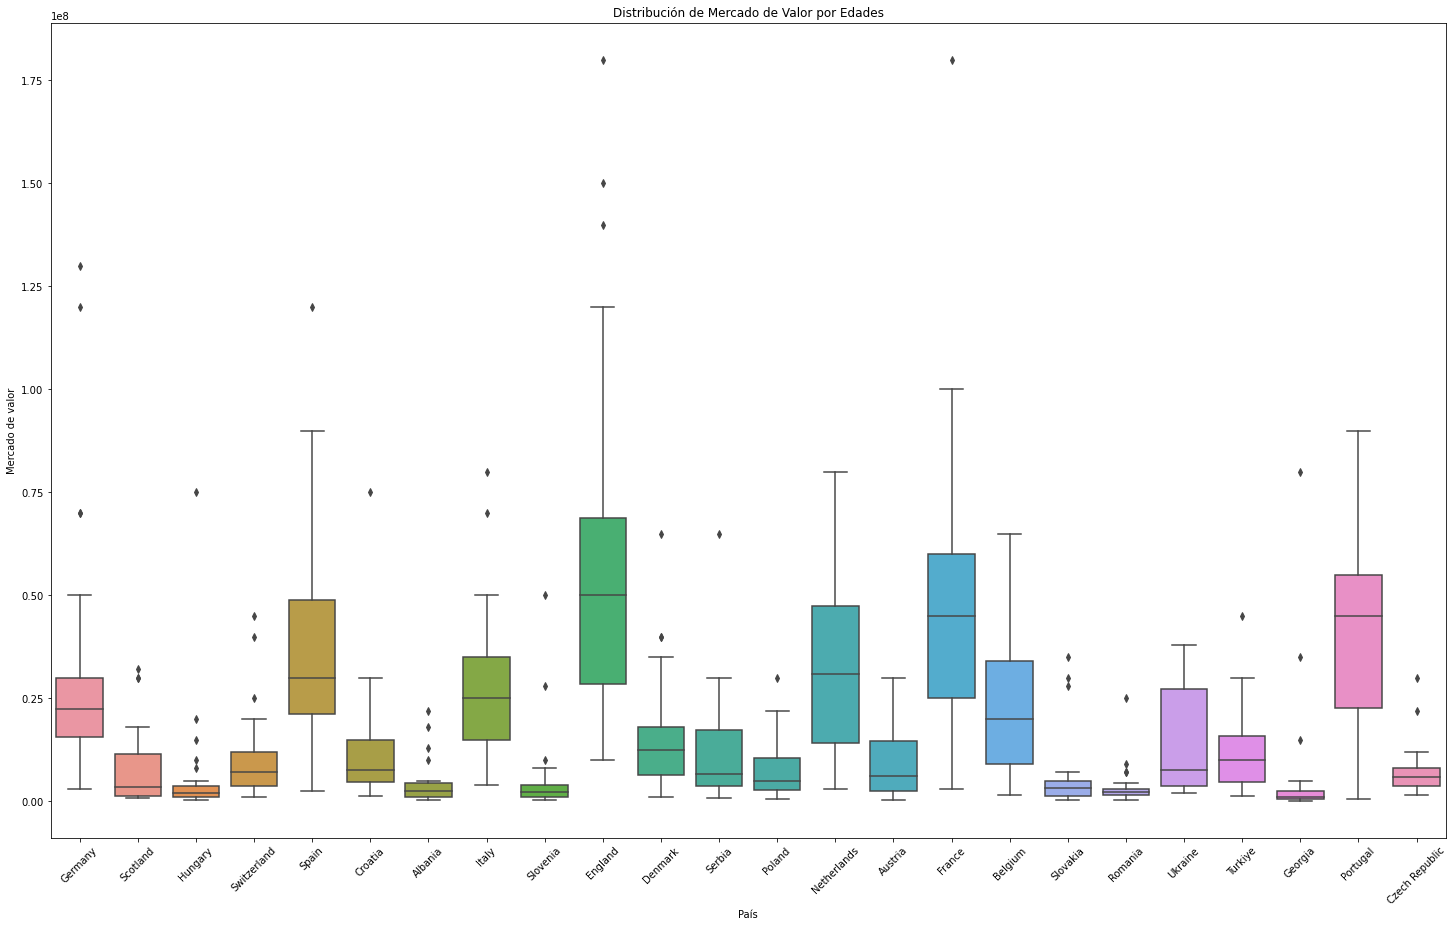

In [9]:
 # Boxplot de edades por posición
plt.figure(figsize=(25, 15))
sns.boxplot(x='Country', y='MarketValue', data= dfjugadores_euro24)
plt.title('Distribución de Mercado de Valor por Edades')
plt.xlabel('País')
plt.ylabel('Mercado de valor')
plt.xticks(rotation=45)
plt.show()

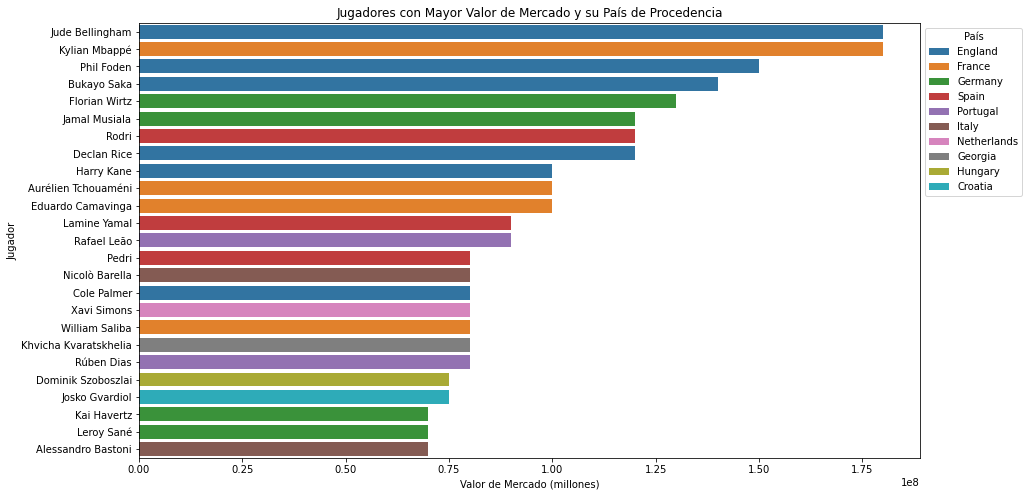

In [10]:
# Gráfico de barras de los jugadores con mayor valor de mercado y su país de procedencia
top_players = dfjugadores_euro24.nlargest(25, 'MarketValue')[['Name', 'MarketValue', 'Country']]
plt.figure(figsize=(14, 8))
sns.barplot(x='MarketValue', y='Name', hue='Country', data=top_players, dodge=False)
plt.title('Jugadores con Mayor Valor de Mercado y su País de Procedencia')
plt.xlabel('Valor de Mercado (millones)')
plt.ylabel('Jugador')
plt.legend(title='País', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

Introduce el nombre del país para visualizar el valor de mercado de sus jugadores: SPAIN


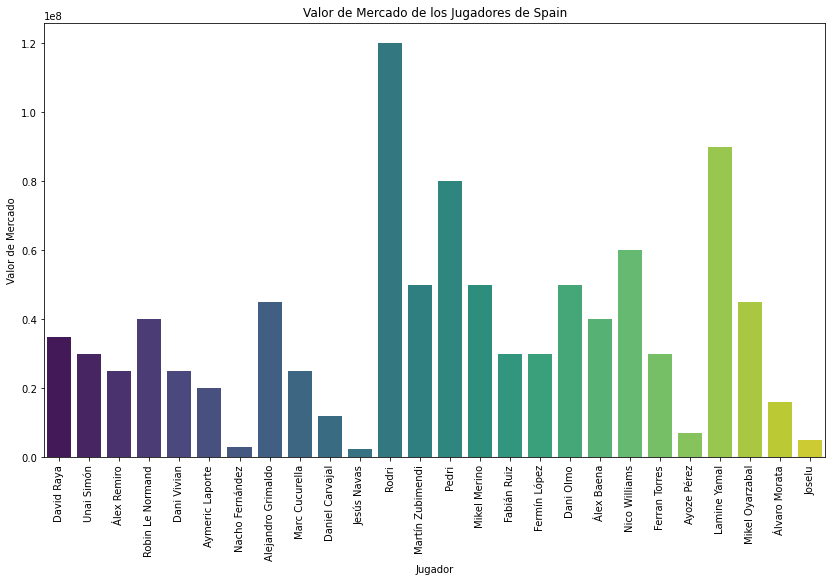

In [13]:
# Visualización del valor de mercado por país
country = input("Introduce el nombre del país para visualizar el valor de mercado de sus jugadores: ").lower()
dfjugadores_euro24['Country'] = dfjugadores_euro24['Country'].str.lower()
country_df = dfjugadores_euro24[dfjugadores_euro24['Country'] == country]

if country_df.empty:
    print(f"No se encontraron jugadores del país: {country}")
else:
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Name', y='MarketValue', data=country_df, palette='viridis')
    plt.title(f'Valor de Mercado de los Jugadores de {country.capitalize()}')
    plt.xlabel('Jugador')
    plt.ylabel('Valor de Mercado')
    plt.xticks(rotation=90)
    plt.show()